In [307]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [322]:
df = pd.read_excel("D:/kerja/asisten riset/vol/milkunarc/cadlan/Analysis3_LUC/emission_CO2_AM1_v2.xlsx", sheet_name="Sheet1")
df.head()

,Country,Subregion,Region,Process,1975,1980,1985,1990,1995,2000,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,Afghanistan,South Asia,Asia,Agricultural Transition Emission,0.002889,0.005104,0.002139,0.004466,0.004352,0.004047,...,0.005007,0.016070,0.011660,0.004634,0.006899,0.008803,0.011969,0.008852,0.007279,0.004440
1,Afghanistan,South Asia,Asia,Agricultural Transition Sequestration,-0.005054,-0.004225,-0.005757,-0.004391,-0.005565,-0.004782,...,-0.010697,-0.004509,-0.003504,-0.006744,-0.014822,-0.007612,-0.006941,-0.006894,-0.004224,-0.006812
2,Afghanistan,South Asia,Asia,Forest Growth,-0.003091,-0.006099,-0.003445,-0.006647,-0.002343,-0.009797,...,-0.004459,-0.009317,-0.003219,-0.009270,-0.002743,-0.009035,-0.003003,-0.009689,-0.003111,-0.008599
3,Afghanistan,South Asia,Asia,Forest Harvest,0.003690,0.001742,0.005096,0.004295,0.012505,0.003420,...,0.006845,0.001254,0.009376,0.000728,0.007725,0.000470,0.008833,0.000484,0.007189,0.000393
4,Afghanistan,South Asia,Asia,LUC Biofuel Emission,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000010,0.000053,0.000000,0.012295,0.000000,0.000179,0.000000,0.000000,0.000000,0.000000


In [323]:
df_columns = df.drop(columns=['Country', 'Subregion','Region'])
df_groupby = df_columns.groupby(['Process']).sum()
df_index = df_groupby.reset_index()
df_index.head()

,Process,1975,1980,1985,1990,1995,2000,2005,2010,2015,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,Agricultural Transition Emission,0.898872,1.005606,0.825561,0.994378,0.937292,1.106297,0.889320,1.242766,0.920412,...,0.979847,2.291091,1.214151,2.032764,0.929828,2.463367,0.971773,2.886017,1.024751,2.397523
1,Agricultural Transition Sequestration,-1.064902,-1.029576,-1.147658,-0.956484,-1.103556,-0.990794,-1.320898,-0.955774,-1.259637,...,-2.609185,-0.947896,-1.953949,-0.954548,-2.589141,-0.940409,-2.472820,-1.085127,-2.692612,-1.000496
2,Forest Growth,-16.831083,-20.728990,-20.400478,-22.588074,-21.149222,-23.679069,-22.721449,-24.450082,-23.792197,...,-25.400985,-26.701920,-24.985779,-26.414246,-25.218176,-26.668863,-25.330792,-26.888239,-24.550368,-26.136948
3,Forest Harvest,18.098514,16.373171,15.767133,15.293438,23.810885,23.125477,21.172545,19.789014,19.944229,...,18.234488,18.691503,18.999841,19.857816,18.624631,20.761039,18.923348,22.566294,20.305590,24.568893
4,LUC Biofuel Emission,0.125735,0.053091,0.037185,0.079555,0.066175,0.071549,0.054807,0.278879,0.704275,...,2.879118,1.385807,0.630019,3.163640,1.623565,3.277428,0.382145,3.144437,0.338633,1.709714


In [329]:
df_filter = df_index[df_index.columns[:11].to_list()]

df_sources = df_filter[(df_filter['Process'] == "Agricultural Transition Emission") |
                     (df_filter['Process'] == "Forest Harvest") | (df_filter['Process'] == "Land Abandonment Emission")\
                        | (df_filter['Process'] == "LUC Biofuel Emission")  | (df_filter['Process'] == "LUC Crops Emission") \
                            | (df_filter['Process'] == "LUC Rangeland Emission")]

df_sinks = df_filter[(df_filter['Process'] != "Agricultural Transition Emission") &
                     (df_filter['Process'] != "Forest Harvest") & (df_filter['Process'] != "Land Abandonment Emission")\
                        & (df_filter['Process'] != "LUC Biofuel Emission")  & (df_filter['Process'] != "LUC Crops Emission") \
                            & (df_filter['Process'] != "LUC Rangeland Emission")]

In [330]:
tahun = list(range(1975, 2025, 5))
df_sources = df_sources.set_index('Process')
df_sinks = df_sinks.set_index('Process')
sources = df_sources.T.values
sinks = df_sinks.T.values
net = df_filter[df_filter.columns[1:].to_list()].sum().to_numpy()

In [396]:
barWidth = 0.25
r1 = np.arange(len(tahun))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

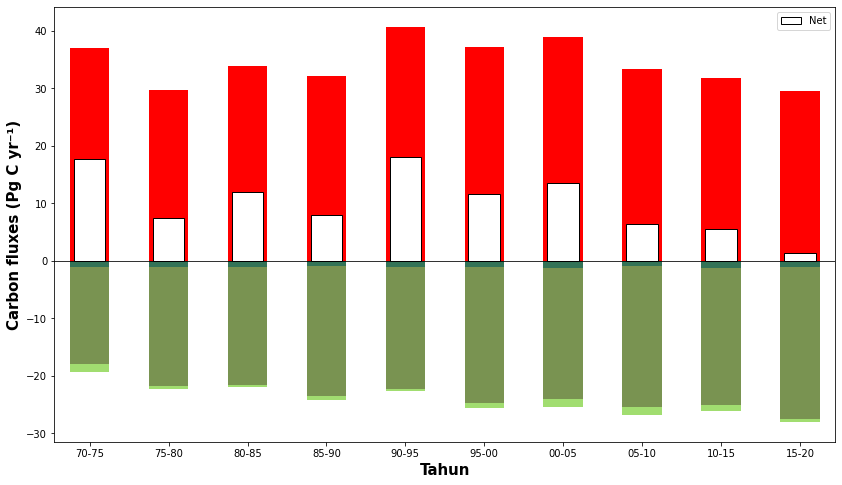

In [440]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Menggabungkan data sources, sinks, dan net menjadi satu DataFrame
data = np.hstack((sources, sinks))
columns = [
    'Agricultural Transition Emission', 'Forest Harvest', 'LUC Biofuel Emission', 'LUC Crops Emission', 
    'LUC Rangeland Emission', 'Land Abandonment Emission', 'Agricultural Transition Sequestration', 
    'Forest Growth Sequestration', 'LUC Biofuel Sequestration', 'LUC Crops Sequestration', 
    'LUC Rangeland Sequestration', 'Land Abandonment Sequestration'
]
df = pd.DataFrame(data, index=tahun, columns=columns)

# Membuat DataFrame untuk net
df_net = pd.DataFrame(net, index=tahun, columns=['Net'])

# Warna untuk grafik
colors = ['#FF0000','#FF0000','#FF0000','#FF0000','#FF0000','#FF0000',
          '#337357','#799351','#C6EBC5','#A1DD70','#A1DD70','#A1DD70']

# Membuat grafik batang vertikal yang ditumpuk untuk sources dan sinks
ax = df.plot(kind='bar', stacked=True, color=colors, figsize=(14, 8), legend=False)

# Menambahkan grafik batang untuk net di atas grafik batang yang ditumpuk
df_net.plot(kind='bar', color='white', ax=ax, position=0.5, width=0.4, edgecolor='black')

# Menambahkan detail ke grafik
plt.xlabel('Tahun', fontweight='bold', fontsize=15)
plt.ylabel('Carbon fluxes (Pg C yr⁻¹)', fontweight='bold', fontsize=15)
plt.xticks([r for r in range(len(tahun))], tahun, rotation=360)
plt.axhline(0, color='black', linewidth=0.8)

# Menambahkan legenda
handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.2, 1.0))

# Menampilkan grafik
plt.show()


In [424]:
df2 = pd.read_excel("D:/kerja/asisten riset/vol/milkunarc/cadlan/Analysis3_LUC/luc_agri_prop_crop_AM1_v3_region.xlsx")
df2 = df2[df2.columns[1:]]
df2['type'] = df2['type'].replace('grass', 'pasture').replace('oil & palm fruit', 'palm oil').replace('other non-food & luxury & spices', 'non food, luxury, spices')
df2['type'] = df2['type'].replace('other temperate cereals', 'temperate cereals')
df2_groupby = df2.groupby(['type']).sum()
df2_index = df2_groupby.reset_index()
df2_index.set_index('type', inplace=True)
df2T = df2_index.T.values

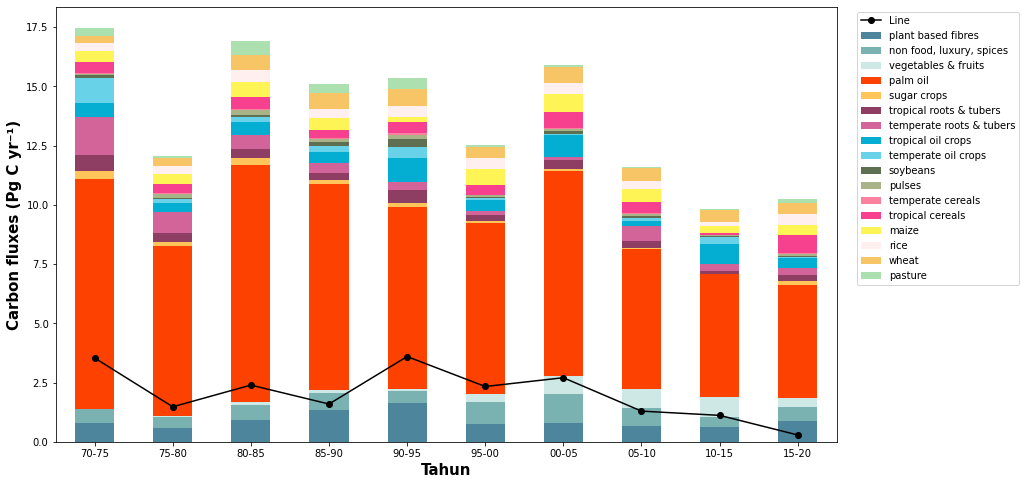

In [453]:
# Data tahun

tahun = ['70-75', '75-80', '80-85', '85-90', '90-95', '95-00', '00-05', '05-10', '10-15', '15-20']

columns = ['plant based fibres','non food, luxury, spices','vegetables & fruits','palm oil',
             'sugar crops','tropical roots & tubers','temperate roots & tubers','tropical oil crops',
             'temperate oil crops','soybeans','pulses','temperate cereals','tropical cereals','maize','rice',
            'wheat','pasture']

colors = ['#4D869C', '#7AB2B2', '#CDE8E5', '#FC4100', '#FFC55A', 
          '#8E3E63', '#D2649A', '#03AED2', '#68D2E8', '#5F6F52', 
          '#A9B388', '#FC819E', '#F7418F', '#FFF455', '#FFEFEF', 
          '#F7C566', '#ACE1AF']

df2 = pd.DataFrame(df2T, index=tahun, columns=columns)


# Membuat grafik batang vertikal yang ditumpuk untuk sources dan sinks
ax2 = df2.plot(kind='bar', stacked=True, color=colors, figsize=(14, 8), legend=False)

df_avg = df_net.values/5

# line_values = [20, 25, 22, 28]

ax2.plot(tahun, df_avg, marker='o', linestyle='-', color='black', label='Line')

# Menambahkan detail ke grafik
plt.xlabel('Tahun', fontweight='bold', fontsize=15)
plt.ylabel('Carbon fluxes (Pg C yr⁻¹)', fontweight='bold', fontsize=15)
plt.xticks([r for r in range(len(tahun))], tahun, rotation=360)
plt.axhline(0, color='black', linewidth=0.8)

# Menambahkan legenda
handles, labels = ax2.get_legend_handles_labels()

ax2.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.24, 1.0))

# Menampilkan grafik
plt.show()